In [1]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


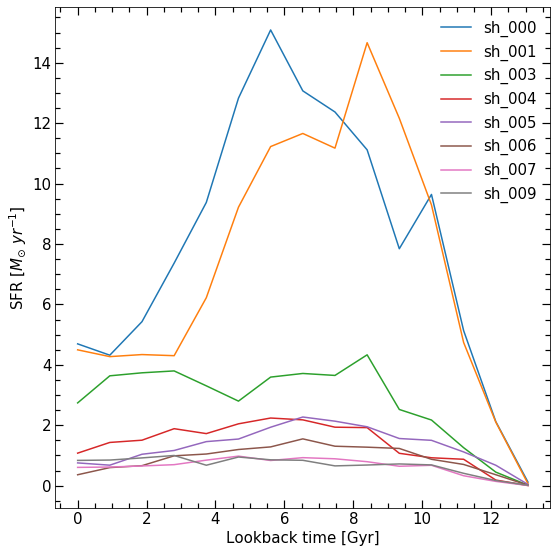

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as times
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

nbin = 15
time = np.linspace(0,14,nbin+1)
SFR = np.zeros(nbin)
    
    
path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]

    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = times.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)
    
    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    rgal = R200*0.15
    
    limit = np.where(rstr < rgal)

    mstr = mstr[amask][limit]*1e10/h
    age = age[limit]
    
    for i in range(nbin):
        mask,= np.where((time[i] < age) & (age < time[i+1]))
        dt = time[i+1]-time[i]
        Mtot = np.sum(mstr[mask])
        
        SFR[i]  = Mtot/(dt*1e9)
    
    ax.plot(time[:-1],SFR, ls='-', label='sh_'+str('%03d'%j))

ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
ax.set_ylabel('SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.set_xlabel('Lookback time [Gyr]',fontsize=15)
ax.legend(fontsize=15,frameon=False)

fig.savefig('../_imagenes/SFR.png',dpi=100, xxbox_inches='tight')